In [144]:
import pandas as pd
import numpy as np

In [55]:
df = pd.read_csv('./Datasets/Data_Combinada.v2')
df.head()

,Unnamed: 0,num_implicados,minutes_from_midnight,cod_distrito,tipo_accidente,tipo_vehiculo,sexo,positiva_alcohol,positiva_droga,bool_laborable,marca_de_clase_edad,day,month,media_edad_pasajeros,numero_pasajeros
0,0,2,90,13.0,0,0,0,0.0,0.0,0,32.0,1,1,39.5,2
1,1,2,90,13.0,0,0,1,0.0,0.0,0,47.0,1,1,39.5,2
2,2,2,30,3.0,1,1,1,1.0,0.0,0,32.0,1,1,37.0,3
3,4,2,30,3.0,1,0,1,0.0,0.0,0,42.0,1,1,37.0,3
4,5,1,110,1.0,2,2,1,0.0,0.0,0,19.0,1,1,19.0,2


# Porcentaje de accidentes con alcohol y sin alcohol

In [56]:
# Analizando la relación entre accidentes con y sin alcohol, y con y sin drogas
# Contando los casos

# Accidentes con y sin alcohol
accidentes_con_alcohol = df[df['positiva_alcohol'] == 1].shape[0]
accidentes_sin_alcohol = df[df['positiva_alcohol'] == 0].shape[0]

# Accidentes con y sin drogas
accidentes_con_drogas = df[df['positiva_droga'] == 1].shape[0]
accidentes_sin_drogas = df[df['positiva_droga'] == 0].shape[0]

(accidentes_con_alcohol, accidentes_sin_alcohol, accidentes_con_drogas, accidentes_sin_drogas)


(2338, 58155, 268, 60225)

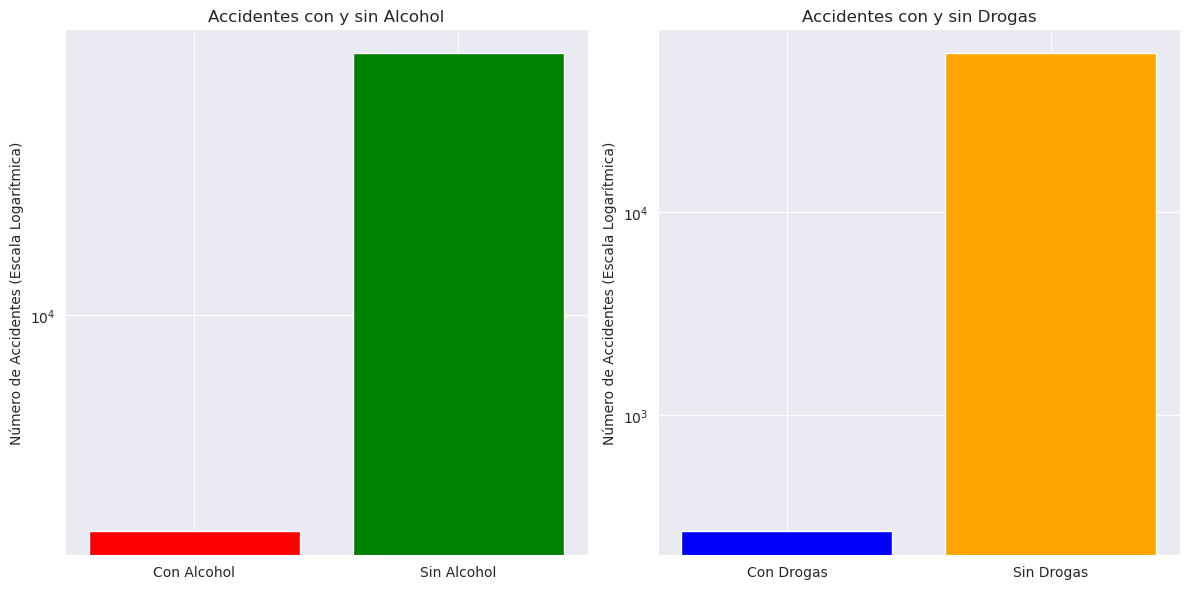

In [57]:
import matplotlib.pyplot as plt

# Preparando los datos para las gráficas
categorias_alcohol = ['Con Alcohol', 'Sin Alcohol']
valores_alcohol = [accidentes_con_alcohol, accidentes_sin_alcohol]

categorias_drogas = ['Con Drogas', 'Sin Drogas']
valores_drogas = [accidentes_con_drogas, accidentes_sin_drogas]

# Creando las gráficas con escala logarítmica
plt.figure(figsize=(12, 6))

# Gráfica para alcohol
plt.subplot(1, 2, 1)
plt.bar(categorias_alcohol, valores_alcohol, color=['red', 'green'])
plt.yscale('log')
plt.title('Accidentes con y sin Alcohol')
plt.ylabel('Número de Accidentes (Escala Logarítmica)')

# Gráfica para drogas
plt.subplot(1, 2, 2)
plt.bar(categorias_drogas, valores_drogas, color=['blue', 'orange'])
plt.yscale('log')
plt.title('Accidentes con y sin Drogas')
plt.ylabel('Número de Accidentes (Escala Logarítmica)')

# Mostrando las gráficas
plt.tight_layout()
plt.show()


Cargamos datacombinada viejo para deshacer los cambios en el código de tipo de vehículo

In [58]:
df_legacy = pd.read_csv('Datasets/Data_Combinada.csv', low_memory=False)
unique_values = df_legacy['tipo_vehiculo'].unique()
dictionary = {code: type_of for code, type_of in enumerate(unique_values)}

df['tipo_vehiculo'] = df['tipo_vehiculo'].map(dictionary)

In [59]:
dictionary

{0: 'Turismo',
 1: 'Motocicleta hasta 125cc',
 2: 'Motocicleta > 125cc',
 3: 'Furgoneta',
 4: 'Camión rígido',
 5: 'Todo terreno',
 6: 'Bicicleta EPAC (pedaleo asistido)',
 7: 'VMU eléctrico',
 8: 'Maquinaria de obras',
 9: 'Ciclomotor',
 10: 'Autobús articulado',
 11: 'Vehículo articulado',
 12: nan,
 13: 'Otros vehículos con motor',
 14: 'Autocaravana',
 15: 'Autobús',
 16: 'Tractocamión',
 17: 'Bicicleta',
 18: 'Cuadriciclo ligero',
 19: 'Sin especificar',
 20: 'Autobús articulado EMT',
 21: 'Autobus EMT',
 22: 'Cuadriciclo no ligero',
 23: 'Camión de bomberos',
 24: 'Ambulancia SAMUR',
 25: 'Ciclo',
 26: 'Moto de tres ruedas > 125cc',
 27: 'Ciclomotor de dos ruedas L1e-B',
 28: 'Moto de tres ruedas hasta 125cc',
 29: 'Semiremolque',
 30: 'Patinete no eléctrico',
 31: 'Remolque',
 32: 'Otros vehículos sin motor',
 33: 'Microbús <= 17 plazas',
 34: 'Tren/metro'}

In [60]:
df.head()

,Unnamed: 0,num_implicados,minutes_from_midnight,cod_distrito,tipo_accidente,tipo_vehiculo,sexo,positiva_alcohol,positiva_droga,bool_laborable,marca_de_clase_edad,day,month,media_edad_pasajeros,numero_pasajeros
0,0,2,90,13.0,0,Turismo,0,0.0,0.0,0,32.0,1,1,39.5,2
1,1,2,90,13.0,0,Turismo,1,0.0,0.0,0,47.0,1,1,39.5,2
2,2,2,30,3.0,1,Motocicleta hasta 125cc,1,1.0,0.0,0,32.0,1,1,37.0,3
3,4,2,30,3.0,1,Turismo,1,0.0,0.0,0,42.0,1,1,37.0,3
4,5,1,110,1.0,2,Motocicleta > 125cc,1,0.0,0.0,0,19.0,1,1,19.0,2


In [66]:
accidentes_por_tipo_vehiculo = df['tipo_vehiculo'].value_counts()

df_accidentes_por_tipo_vehiculo = accidentes_por_tipo_vehiculo.reset_index()
df_accidentes_por_tipo_vehiculo.columns = ['Tipo de Vehículo', 'Número de Accidentes']

df_accidentes_por_tipo_vehiculo.sort_values(by= 'Número de Accidentes', inplace=True, ascending=False)

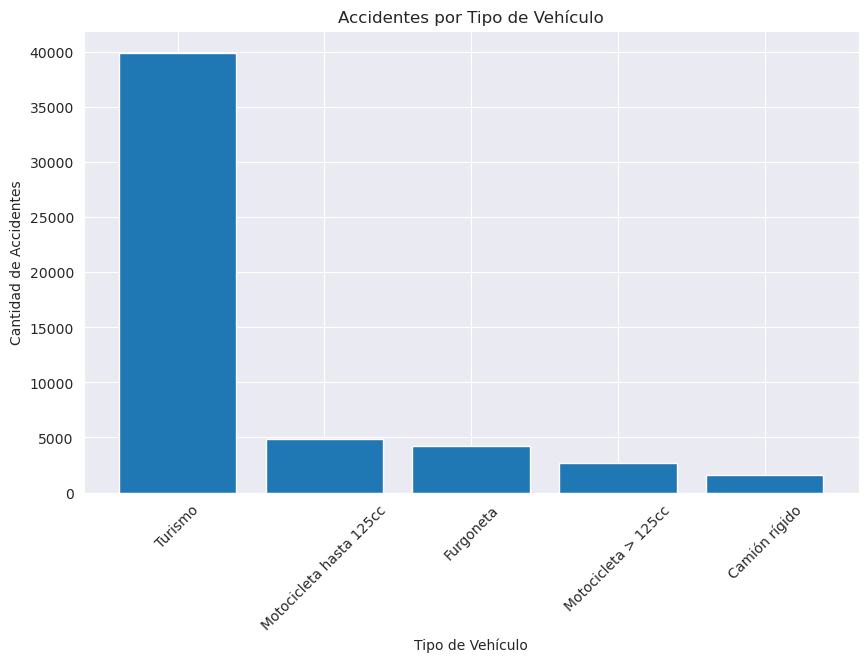

In [70]:
plt.figure(figsize=(10, 6))
plt.bar(df_accidentes_por_tipo_vehiculo['Tipo de Vehículo'].head(), df_accidentes_por_tipo_vehiculo['Número de Accidentes'].head())
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Cantidad de Accidentes')
plt.title('Accidentes por Tipo de Vehículo')
plt.xticks(rotation=45)
plt.show()

In [89]:
df_accidentes_por_sexo = df['sexo'].value_counts()
df_accidentes_por_sexo

sexo
1    45752
0    14741
Name: count, dtype: int64

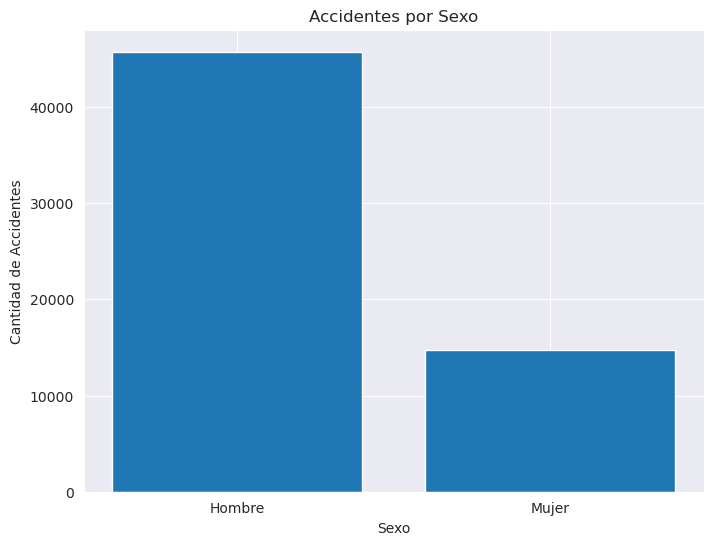

In [90]:
plt.figure(figsize=(8, 6))
plt.bar(['Hombre', 'Mujer'], df_accidentes_por_sexo)
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Accidentes')
plt.title('Accidentes por Sexo')
plt.show()


In [97]:
contingencia_alcohol = pd.crosstab(df['sexo'], df['positiva_alcohol'], dropna=False)
contingencia_alcohol.rename({0:'Mujer', 1:'Hombre'}, inplace=True)

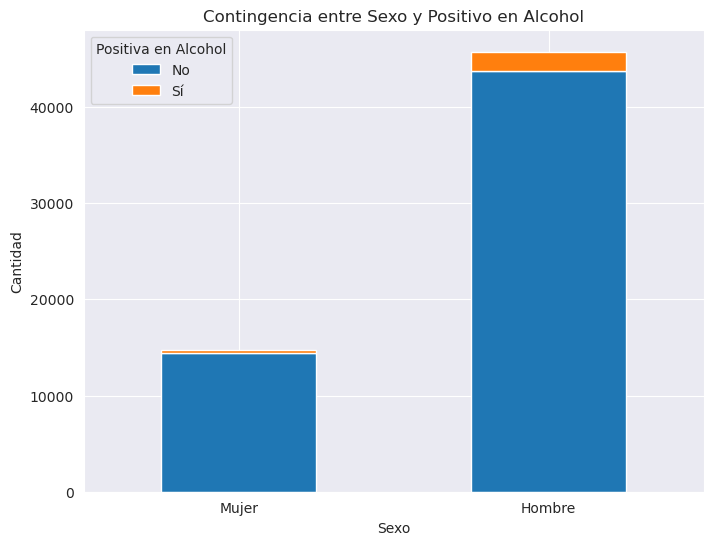

In [101]:
contingencia_alcohol.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('Sexo')
plt.xticks(rotation=0)
plt.ylabel('Cantidad')
plt.title('Contingencia entre Sexo y Positivo en Alcohol')
plt.legend(title='Positiva en Alcohol', labels=['No', 'Sí'])
plt.show()

Calculamos los porcentajes relativos tanto para hombre como para mujer

In [114]:
df_sexo_alcohol = df.filter(items=['sexo', 'positiva_alcohol'])

In [147]:
# TODO Continuar desde aquí
numero_accidentes_sexo = np.array(df_sexo_alcohol.groupby(['sexo']).size())
positivos_accidentes_sexo = np.array(df_sexo_alcohol[df_sexo_alcohol['positiva_alcohol'] == 1].groupby(['sexo']).size())

In [148]:
numero_accidentes_sexo

array([14741, 45752])

In [149]:
positivos_accidentes_sexo / numero_accidentes_sexo

array([0.02218303, 0.04395436])

Por lo que concluimos que es el doble de probable que los implicados varones den positivo alcohol que las implicadas mujeres